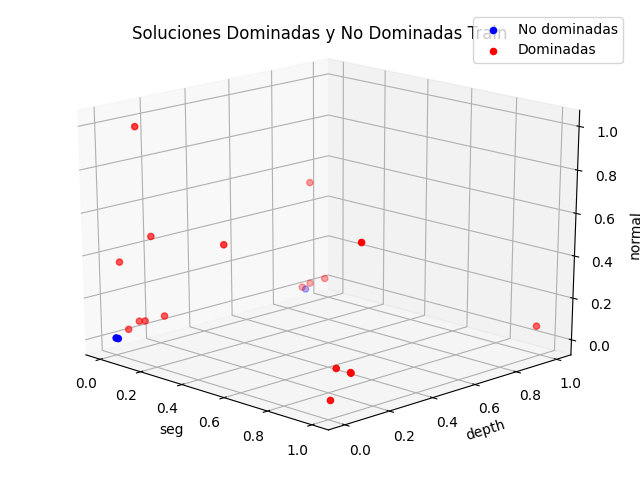

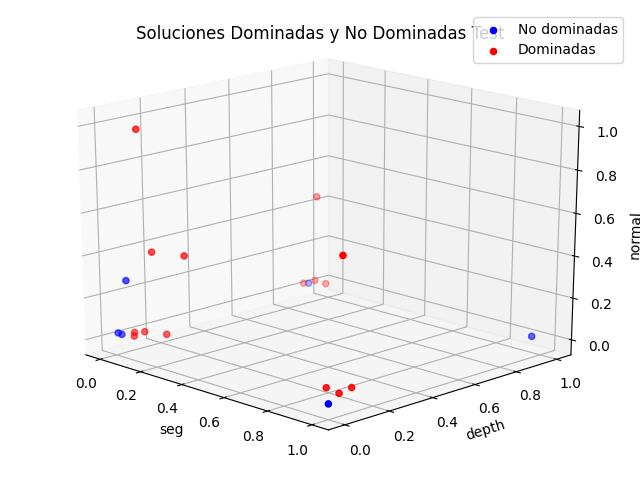

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
import glob

def dominance(a, b):
    """
    Determina si el vector de solución 'a' domina al vector de solución 'b'.

    Args:
    - a (list or numpy array): Vector de solución candidato.
    - b (list or numpy array): Vector de solución con el que se compara.

    Returns:
    - dom (bool): True si 'a' domina a 'b', False en caso contrario.
    """
    dom = all(ai <= bi for ai, bi in zip(a, b))
    #print('dom ', dom)
    return dom

def archive_update_pq(metrics_seg, metrics_depth, metrics_normal):
    """
    Actualiza el archivo con respecto a las métricas.
    """
    nA = len(metrics_seg)
    nP = len(metrics_seg)

    dominated_indices = []

    for i in range(nP):
        discard = False
        for j in range(nA):
            #print('\npunto 1: ', [metrics_seg[i], metrics_depth[i], metrics_normal[i]])
            #print('punto 2: ', [metrics_seg[j], metrics_depth[j], metrics_normal[j]])
            if i != j:
                if dominance([metrics_seg[j], metrics_depth[j], metrics_normal[j]], [metrics_seg[i], metrics_depth[i], metrics_normal[i]]):
                    discard = True
                    #print('i: ', i)
                    dominated_indices.append(i)
                    #print('dominated_indices: ', dominated_indices, '\n')
                    break

    return dominated_indices

if __name__ == "__main__":
    # Patrón para buscar archivos
    file_pattern = '/home/carmen/auto-lambda/logging/mtl_dense_mtan_nyuv2_all_combinations_none*.npy'
    # file_equal = '/home/carmen/auto-lambda/logging/other_methods/mtl_dense_split_nyuv2_all_equal_none_0_.npy'
    # Obtener la lista de archivos que coinciden con el patrón
    archivos = glob.glob(file_pattern)

    ##archivos.append(file_equal)

    metrics = {
        'seg': [],
        'depth': [],
        'normal': [],
        'all': []
    }

    losses = {
        'seg': [],
        'depth': [],
        'normal': [],
        'all': []
    }

    for archivo in archivos:
        data = np.load(archivo, allow_pickle=True).item()

        train_loss = data['train_loss']
        test_loss = data['test_loss']

        train_metric_keys = list(test_loss.keys())

        for i, key in enumerate(train_metric_keys):
            #last_loss, last_metric = test_loss[key][-1]
            if key !=  'all':
                losses[key].append(train_loss[key][-1][0])
                metrics[key].append(train_loss[key][-1][1])
        
    # Ejemplo de métricas
    metrics_seg = [-i for i in metrics['seg']]
    metrics_depth = metrics['depth']
    metrics_normal = metrics['normal']

    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    metrics_seg = scaler.fit_transform(np.array(metrics_seg).reshape(-1, 1))
    metrics_depth = scaler.fit_transform(np.array(metrics_depth).reshape(-1, 1))
    metrics_normal = scaler.fit_transform(np.array(metrics_normal).reshape(-1, 1))

    dominated_indices = archive_update_pq(metrics_seg, metrics_depth, metrics_normal)

    # Plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot soluciones no dominadas
    non_dominated = np.delete(np.arange(len(metrics_seg)), dominated_indices)
    ax.scatter(np.array(metrics_seg)[non_dominated], np.array(metrics_depth)[non_dominated], np.array(metrics_normal)[non_dominated], color='blue', label='No dominadas')

    # Plot soluciones dominadas
    ax.scatter(np.array(metrics_seg)[dominated_indices], np.array(metrics_depth)[dominated_indices], np.array(metrics_normal)[dominated_indices], color='red', label='Dominadas')

    # Añadir etiquetas de ejes
    ax.set_xlabel('seg')
    ax.set_ylabel('depth')
    ax.set_zlabel('normal')

    # Ajustar la posición de las etiquetas
    ax.view_init(elev=20, azim=-45)
    ax.set_title('Soluciones Dominadas y No Dominadas Train')
    ax.legend()
    plt.show()

####################################################################################################3
    metrics = {
        'seg': [],
        'depth': [],
        'normal': [],
        'all': []
    }

    losses = {
        'seg': [],
        'depth': [],
        'normal': [],
        'all': []
    }


    for archivo in archivos:
        data = np.load(archivo, allow_pickle=True).item()

        train_loss = data['test_loss']
        test_loss = data['test_loss']

        train_metric_keys = list(test_loss.keys())

        for i, key in enumerate(train_metric_keys):
            #last_loss, last_metric = test_loss[key][-1]
            if key !=  'all':
                losses[key].append(train_loss[key][-1][0])
                metrics[key].append(train_loss[key][-1][1])
        
    # Ejemplo de métricas
    metrics_seg = [-i for i in metrics['seg']]
    metrics_depth = metrics['depth']
    metrics_normal = metrics['normal']

    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    metrics_seg = scaler.fit_transform(np.array(metrics_seg).reshape(-1, 1))
    metrics_depth = scaler.fit_transform(np.array(metrics_depth).reshape(-1, 1))
    metrics_normal = scaler.fit_transform(np.array(metrics_normal).reshape(-1, 1))

    dominated_indices = archive_update_pq(metrics_seg, metrics_depth, metrics_normal)

    # Plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot soluciones no dominadas
    non_dominated = np.delete(np.arange(len(metrics_seg)), dominated_indices)
    ax.scatter(np.array(metrics_seg)[non_dominated], np.array(metrics_depth)[non_dominated], np.array(metrics_normal)[non_dominated], color='blue', label='No dominadas')

    # Plot soluciones dominadas
    ax.scatter(np.array(metrics_seg)[dominated_indices], np.array(metrics_depth)[dominated_indices], np.array(metrics_normal)[dominated_indices], color='red', label='Dominadas')

    # Añadir etiquetas de ejes
    ax.set_xlabel('seg')
    ax.set_ylabel('depth')
    ax.set_zlabel('normal')

    # Ajustar la posición de las etiquetas
    ax.view_init(elev=20, azim=-45)
    ax.set_title('Soluciones Dominadas y No Dominadas Test')
    ax.legend()
    plt.show()    


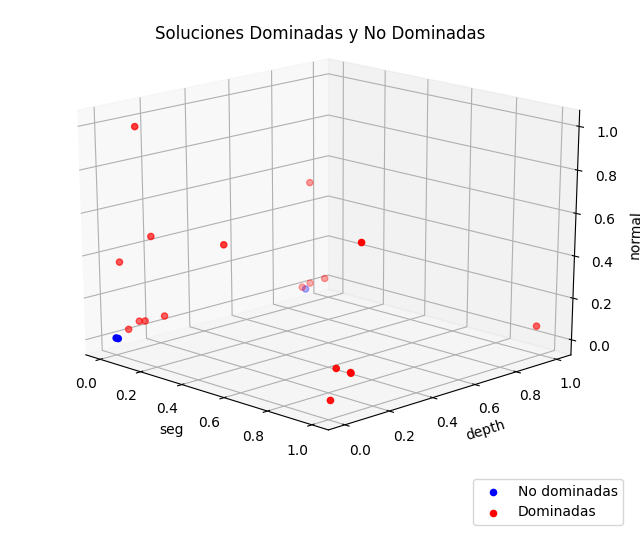

<Figure size 640x480 with 0 Axes>

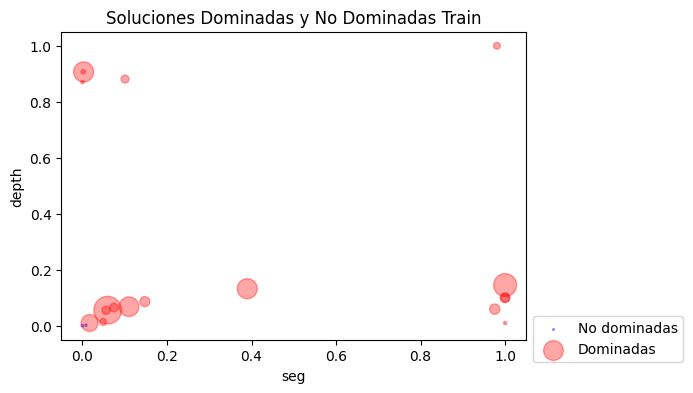

<Figure size 640x480 with 0 Axes>

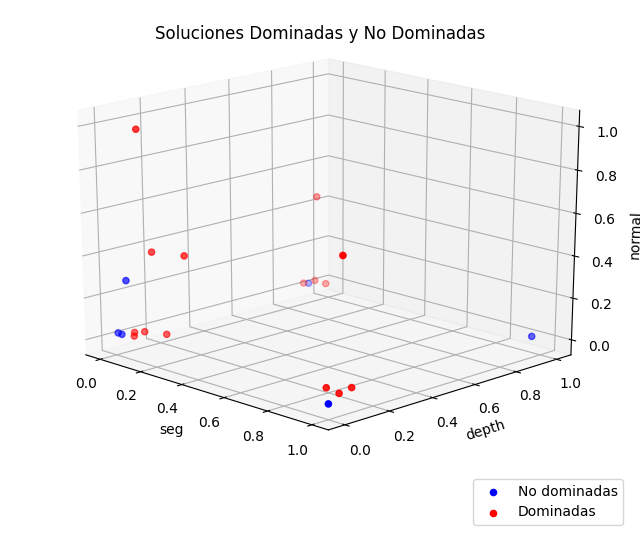

<Figure size 640x480 with 0 Axes>

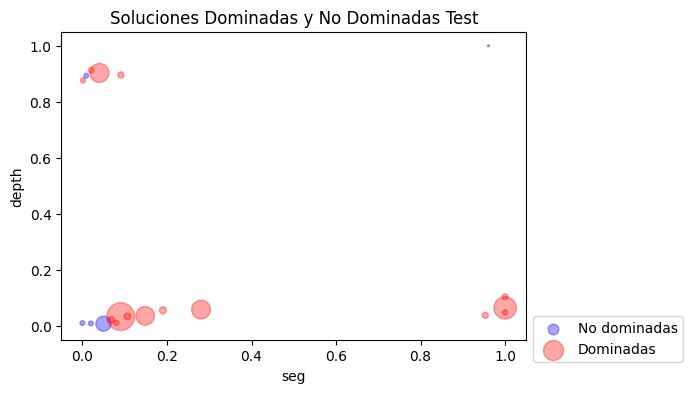

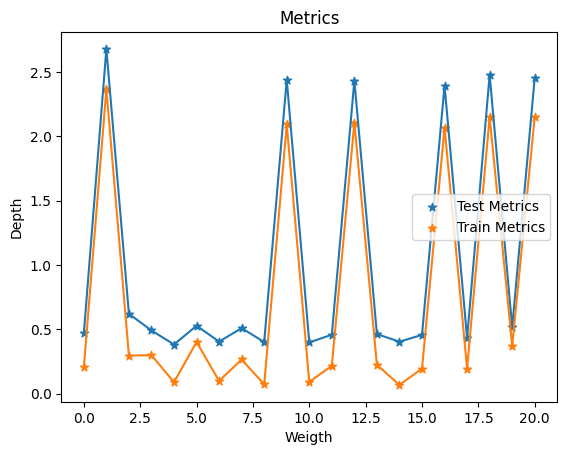

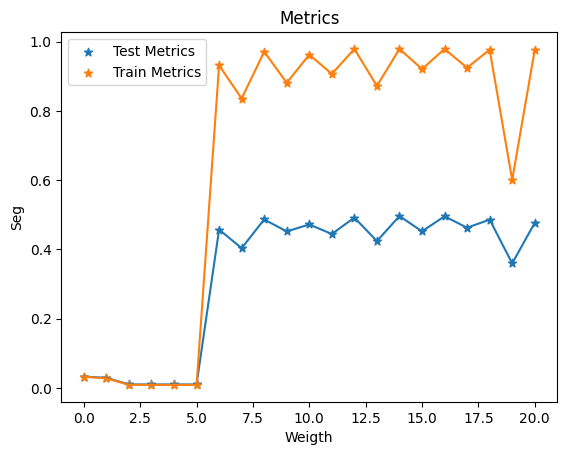

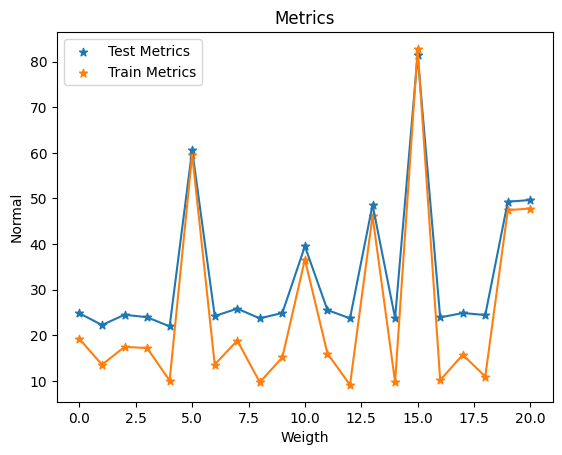

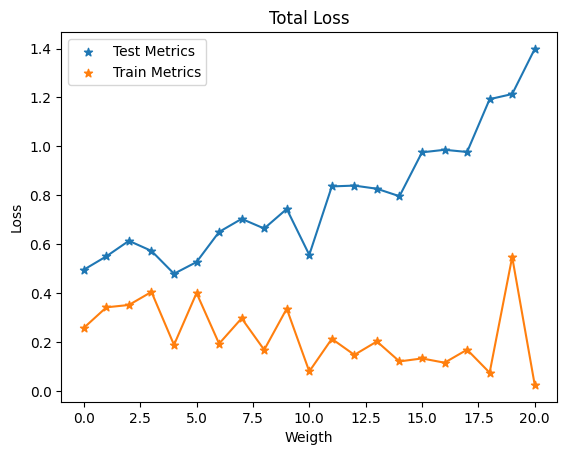

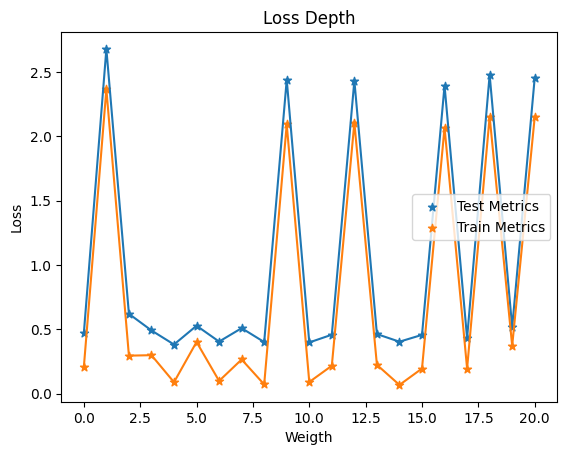

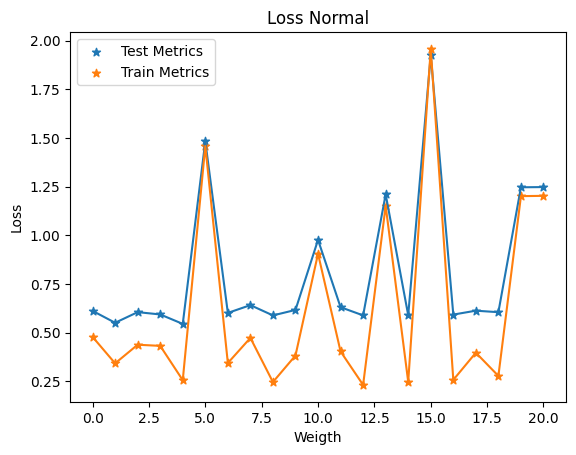

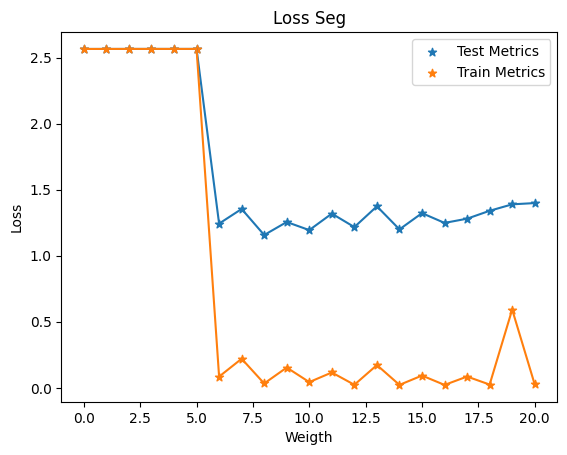

<Figure size 640x480 with 0 Axes>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import glob
from mpl_toolkits.mplot3d import Axes3D

def dominance(a, b):
    """
    Determina si el vector de solución 'a' domina al vector de solución 'b'.

    Args:
    - a (list or numpy array): Vector de solución candidato.
    - b (list or numpy array): Vector de solución con el que se compara.

    Returns:
    - dom (bool): True si 'a' domina a 'b', False en caso contrario.
    """
    return all(ai <= bi for ai, bi in zip(a, b))

def archive_update_pq(metrics_seg, metrics_depth, metrics_normal):
    """
    Actualiza el archivo con respecto a las métricas.
    """
    dominated_indices = []

    for i, (seg, depth, normal) in enumerate(zip(metrics_seg, metrics_depth, metrics_normal)):
        for j, (seg_other, depth_other, normal_other) in enumerate(zip(metrics_seg, metrics_depth, metrics_normal)):
            if i != j and dominance([seg_other, depth_other, normal_other], [seg, depth, normal]):
                dominated_indices.append(i)
                break

    return dominated_indices

def plot_metrics(metrics_seg, metrics_depth, metrics_normal, dominated_indices, title, save=True, saveTitle = None):
    fig, ax = plt.subplots(figsize=(6, 4))

    non_dominated = np.delete(np.arange(len(metrics_seg)), dominated_indices)

    ax.scatter(np.array(metrics_seg)[non_dominated], np.array(metrics_depth)[non_dominated], s=np.array(metrics_normal)[non_dominated]*400, alpha = 0.35, color='blue', label='No dominadas')
    ax.scatter(np.array(metrics_seg)[dominated_indices], np.array(metrics_depth)[dominated_indices], s=np.array(metrics_normal)[dominated_indices]*400, alpha = 0.35, color='red', label='Dominadas')

    ax.set_xlabel('seg')
    ax.set_ylabel('depth')
    ax.set_title(title)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 0.1)) 
    #ax.legend(loc='upper right', bbox_to_anchor=(0, 1))   
    plt.show()
    if save:    
        plt.savefig('figures/Results/' + title + saveTitle +  '.pdf' )   
        plt.savefig('figures/Results/' + title + saveTitle + '.png' )     



def plot_dominated_solutions3D(metrics_seg, metrics_depth, metrics_normal, dominated_indices, save=True, saveTitle = None):
    """
    Grafica las soluciones dominadas y no dominadas en un espacio tridimensional.

    Args:
    - metrics_seg (list): Métricas de segmentación.
    - metrics_depth (list): Métricas de profundidad.
    - metrics_normal (list): Métricas normales.
    - dominated_indices (list): Índices de soluciones dominadas.
    """
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    non_dominated = np.delete(np.arange(len(metrics_seg)), dominated_indices)
    ax.scatter(metrics_seg[non_dominated], metrics_depth[non_dominated], metrics_normal[non_dominated], color='blue', label='No dominadas')
    ax.scatter(metrics_seg[dominated_indices], metrics_depth[dominated_indices], metrics_normal[dominated_indices], color='red', label='Dominadas')

    ax.set_xlabel('seg')
    ax.set_ylabel('depth')
    ax.set_zlabel('normal')
    ax.view_init(elev=20, azim=-45)
    ax.set_title('Soluciones Dominadas y No Dominadas')
    #ax.legend()
    ax.legend(loc='upper right', bbox_to_anchor=(1, 0)) 
    plt.show()
    if save:    
        plt.savefig('figures/Results/'  + saveTitle +  '.pdf' )   
        plt.savefig('figures/Results/'  + saveTitle + '.png' )     



def plot_performance_with_weigths(title, metrics_test, metrics_train, pesos, ylabel, save=True, saveTitle = None):
    pesos_array = np.asarray(pesos)
    t = pesos_array[:,0].reshape(-1, 1)

    sorted_indices  = np.argsort(t[:,0])

    plt.scatter(np.arange(len(metrics_test[sorted_indices])), metrics_test[sorted_indices],  marker='*', label='Test Metrics')
    plt.plot(np.arange(len(metrics_test[sorted_indices])), metrics_test[sorted_indices])
    plt.scatter(np.arange(len(metrics_train[sorted_indices])), metrics_train[sorted_indices],  marker='*', label='Train Metrics')
    plt.plot(np.arange(len(metrics_train[sorted_indices])), metrics_train[sorted_indices])    

    plt.xlabel('Weigth')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()
    if save:    
        plt.savefig('figures/Results/'  + saveTitle +  '.pdf' )   
        plt.savefig('figures/Results/'  + saveTitle + '.png' )    


if __name__ == "__main__":
    # Patrón para buscar archivos
    file_pattern = '/home/carmen/auto-lambda/logging/mtl_dense_mtan_nyuv2_all_combinations_none*.npy'
    archivos = glob.glob(file_pattern)

    metrics_train = {
        'seg': [],
        'depth': [],
        'normal': [],
        'all': []
    }

    metrics_test = {
        'seg': [],
        'depth': [],
        'normal': [],
        'all': []
    }

    losses_train = {
        'seg': [],
        'depth': [],
        'normal': [],
        'all': []
    }
        
    losses_test = {
        'seg': [],
        'depth': [],
        'normal': [],
        'all': []
    }
    pesos = []


    for archivo in archivos:
        data = np.load(archivo, allow_pickle=True).item()
        train_loss = data['train_loss']
        test_loss = data['test_loss']
        pesos.append(data['weight'][0])

        for key in test_loss.keys():
            if key != 'all':
                metrics_train[key].append(train_loss[key][-1][1])
                metrics_test[key].append(test_loss[key][-1][1])
                losses_train[key].append(train_loss[key][-1][0])
                losses_test[key].append(test_loss[key][-1][0])    
            metrics_train['all'].append(test_loss['all'])
            metrics_test['all'].append(test_loss['all'])

    # Ejemplo de métricas


    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

    metrics_seg = [-i for i in metrics_train['seg']]
    metrics_seg = scaler.fit_transform(np.array(metrics_seg).reshape(-1, 1))
    metrics_depth = scaler.fit_transform(np.array(metrics_train['depth']).reshape(-1, 1))
    metrics_normal = scaler.fit_transform(np.array(metrics_train['normal']).reshape(-1, 1))

    dominated_indices_train = archive_update_pq(metrics_seg, metrics_depth, metrics_normal)

    plot_dominated_solutions3D(metrics_seg, metrics_depth, metrics_normal, dominated_indices_train, saveTitle = '_Split')
    plot_metrics(metrics_seg, metrics_depth, metrics_normal, dominated_indices_train, 'Soluciones Dominadas y No Dominadas Train', saveTitle = '_Split')

    metrics_seg = [-i for i in metrics_test['seg']]
    metrics_seg = scaler.fit_transform(np.array(metrics_seg).reshape(-1, 1))
    metrics_depth = scaler.fit_transform(np.array(metrics_test['depth']).reshape(-1, 1))
    metrics_normal = scaler.fit_transform(np.array(metrics_test['normal']).reshape(-1, 1))

    dominated_indices_test = archive_update_pq(metrics_seg, metrics_depth, metrics_normal)

    plot_dominated_solutions3D(metrics_seg, metrics_depth, metrics_normal, dominated_indices_test, saveTitle = '_Split')
    plot_metrics(metrics_seg, metrics_depth, metrics_normal, dominated_indices_test, 'Soluciones Dominadas y No Dominadas Test', saveTitle = '_Split')


    plot_performance_with_weigths('Metrics', np.asarray(metrics_test['depth']), np.asarray(metrics_train['depth']), pesos, 'Depth', saveTitle = '_Split')
    plot_performance_with_weigths('Metrics', np.asarray(metrics_test['seg']), np.asarray(metrics_train['seg']), pesos, 'Seg', saveTitle = '_Split')
    plot_performance_with_weigths('Metrics', np.asarray(metrics_test['normal']), np.asarray(metrics_train['normal']), pesos, 'Normal', saveTitle = '_Split')


    import pandas as pd
    losses_test.popitem()
    losses_train.popitem()
    
    df_loss_test  = pd.DataFrame(losses_test)
    df_loss_train  = pd.DataFrame(losses_train)

    df_loss_test['weights'] = pesos 
    # Separar la columna 'weights' en tres columnas separadas
    df_loss_test[['weight_1', 'weight_2', 'weight_3']] = pd.DataFrame(df_loss_test['weights'].tolist())
    # Calcular la pérdida total ponderada
    df_loss_test['perdida_total'] = df_loss_test['seg'] * df_loss_test['weight_1'] + df_loss_test['depth'] *df_loss_test['weight_2'] + df_loss_test['normal'] * df_loss_test['weight_3']

    df_loss_train['weights'] = pesos 
    # Separar la columna 'weights' en tres columnas separadas
    df_loss_train[['weight_1', 'weight_2', 'weight_3']] = pd.DataFrame(df_loss_train['weights'].tolist())
    # Calcular la pérdida total ponderada
    df_loss_train['perdida_total'] = df_loss_train['seg'] * df_loss_train['weight_1'] + df_loss_train['depth'] *df_loss_train['weight_2'] + df_loss_train['normal'] * df_loss_train['weight_3']



    plot_performance_with_weigths('Total Loss', df_loss_test['perdida_total'], df_loss_train['perdida_total'], pesos, 'Loss', saveTitle = '_Split')
    plot_performance_with_weigths('Loss Depth', df_loss_test['depth'], df_loss_train['depth'], pesos, 'Loss', saveTitle = '_Split')
    plot_performance_with_weigths('Loss Normal', df_loss_test['normal'], df_loss_train['normal'], pesos, 'Loss', saveTitle = '_Split')
    plot_performance_with_weigths('Loss Seg', df_loss_test['seg'], df_loss_train['seg'], pesos, 'Loss', saveTitle = '_Split')

    #plt.plot(df_loss_train['perdida_total'], saveTitle = '_Split')
    #plt.plot(df_loss_test['perdida_total'], saveTitle = '_Split')

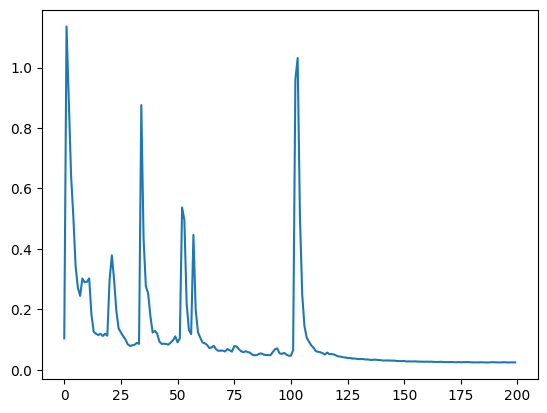

In [10]:
plt.plot(train_loss['seg'][:,0])

In [13]:
import pandas as pd
import numpy as np
import glob

file_pattern = '/home/carmen/auto-lambda/logging/mtl_dense_mtan_nyuv2_all_combinations_none*.npy'
archivos = glob.glob(file_pattern)

metrics_train = {
    'seg': [],
    'depth': [],
    'normal': [],
    'all': []
}

metrics_test = {
    'seg': [],
    'depth': [],
    'normal': [],
    'all': []
}

losses_train = {
    'seg': [],
    'depth': [],
    'normal': [],
    'all': []
}
    
losses_test = {
    'seg': [],
    'depth': [],
    'normal': [],
    'all': []
}
pesos = []


for archivo in archivos:
    data = np.load(archivo, allow_pickle=True).item()
    train_loss = data['train_loss']
    test_loss = data['test_loss']
    pesos.append(data['weight'][0])

    for key in test_loss.keys():
        if key != 'all':
            metrics_train[key].append(train_loss[key][:, 1])
            metrics_test[key].append(test_loss[key][:, 1])
            losses_train[key].append(train_loss[key][:, 0])
            losses_test[key].append(test_loss[key][:, 0])    
        metrics_train['all'].append(test_loss['all'])
        metrics_test['all'].append(test_loss['all'])


In [142]:
len(archivos)

21

4


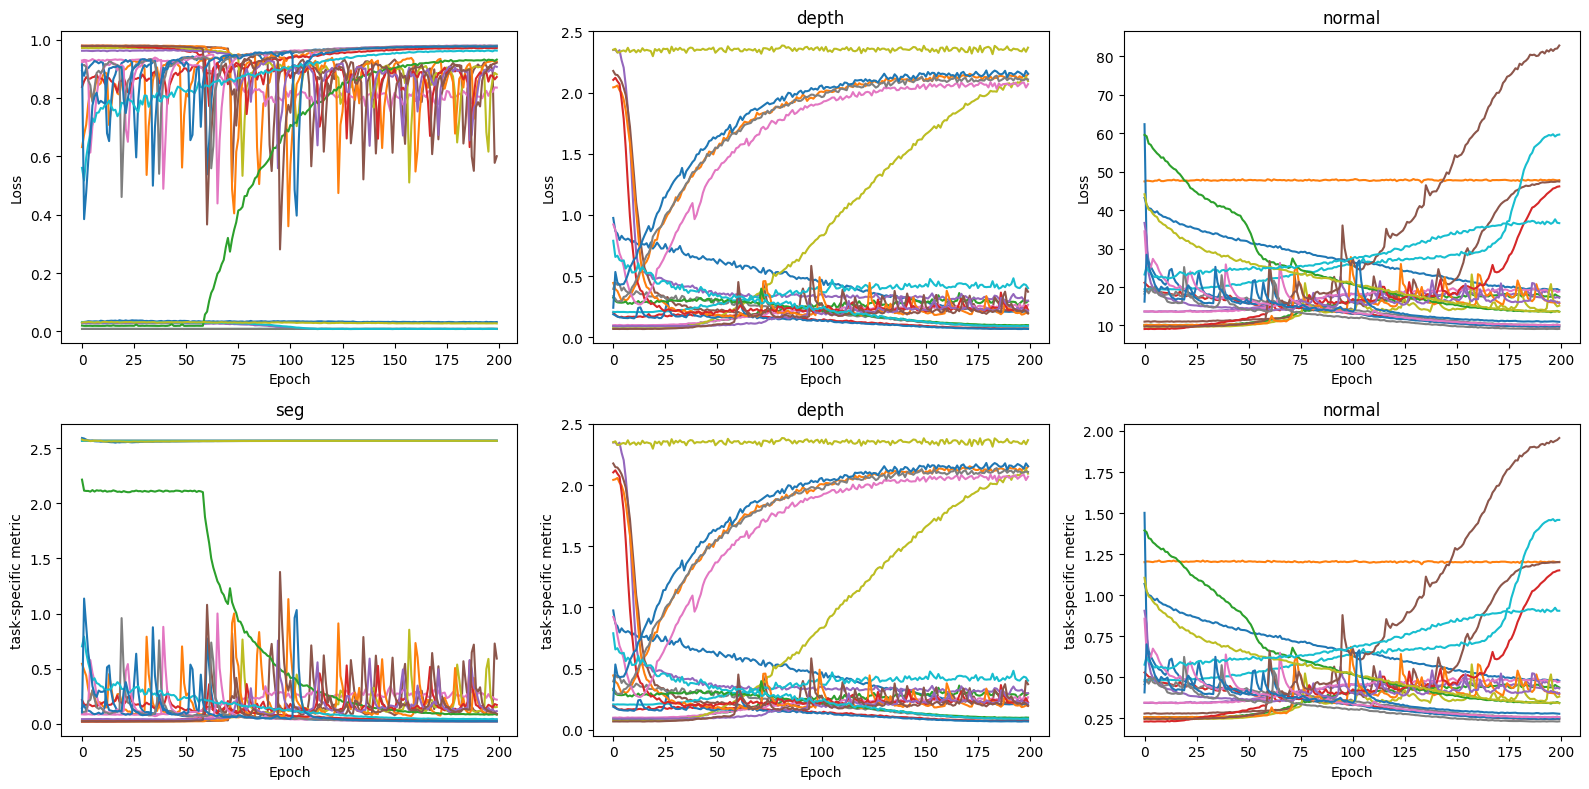

In [14]:
train_metric_keys = list(metrics_train.keys())

# Calcula el número de métricas
num_metrics = len(train_metric_keys)
labels = ['Loss', 'task-specific metric', 'All']
print(num_metrics)
fig, axes = plt.subplots(2, num_metrics-1, figsize=(16, 8))  # Ajusta el tamaño según tus necesidades

for i, key in enumerate(train_metric_keys[:3]):
    axes[0, i].plot(np.asarray((metrics_train[key])).transpose(), label=f'Train {key}')
   # axes[0, i].plot(np.asarray((metrics_test[key])).transpose(), label=f'Test {key}')    
    axes[0, i].set_xlabel('Epoch')
    axes[0, i].set_ylabel(labels[0])
    axes[0, i].set_title(key)

    axes[1, i].plot(np.asarray((losses_train[key])).transpose(), label=f'Train {key}')
   # axes[1, i].plot(np.asarray((losses_test[key])).transpose(), label=f'Test {key}')    
    axes[1, i].set_xlabel('Epoch')
    axes[1, i].set_ylabel(labels[1])
    axes[1, i].set_title(key)
   # axes[j, i].legend()  # Agrega una leyenda para cada gráfico
   

    # Ajusta el espaciado entre los subgráficos
    plt.tight_layout()
#if save:    
#plt.savefig('figures/Results/' + get_weight_str(t.lambda_weight[0], t.train_tasks) + t.network + '_' + t.dataset + '.pdf' )   
#plt.savefig('figures/Results/' + get_weight_str(t.lambda_weight[0], t.train_tasks) + t.network + '_' + t.dataset + '.png' )     
# Muestra los subgráficos
plt.show()

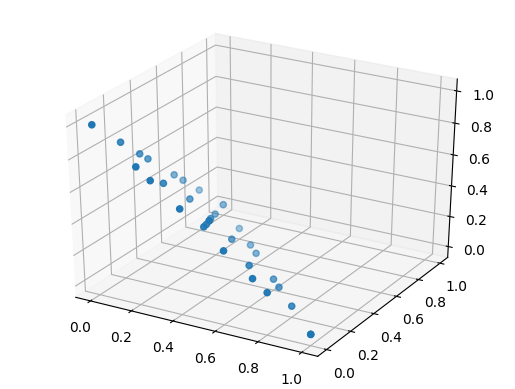

In [138]:
df_pesos = pd.DataFrame(pesos)
df_pesos = df_pesos.sort_values(by=0)

# Creamos una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pesos[0], df_pesos[1], df_pesos[2])



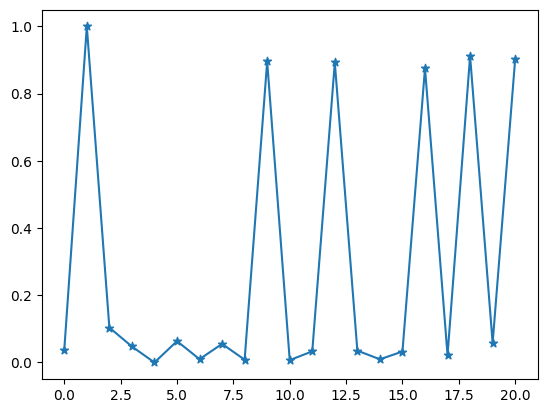

In [6]:
pesos_array = np.asarray(pesos)
t = pesos_array[:,0].reshape(-1, 1)

sorted_indices  = np.argsort(t[:,0])

plt.scatter(np.arange(len(metrics_depth[sorted_indices])), metrics_depth[sorted_indices],  marker='*')
plt.plot(np.arange(len(metrics_depth[sorted_indices])), metrics_depth[sorted_indices])

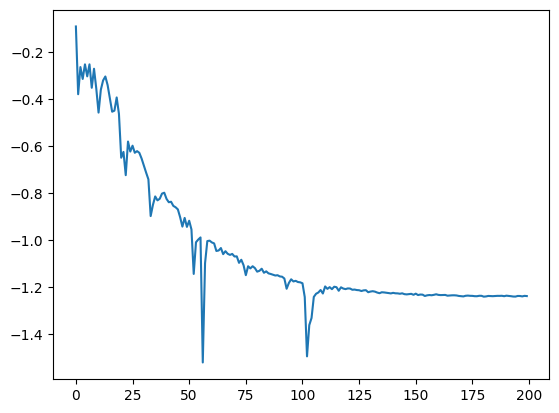

In [33]:
plt.plot(test_loss['all'])

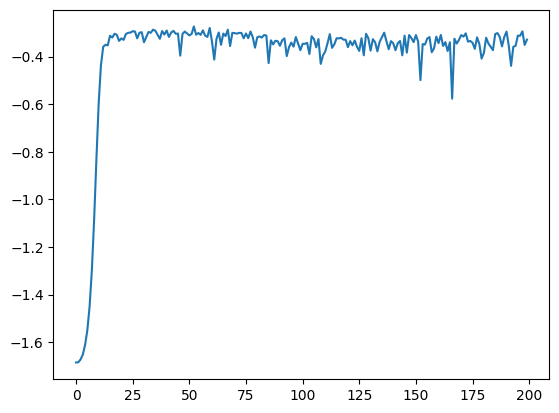

In [44]:
plt.plot(metrics_test['all'][19])

peso:  [0.         0.79992858 0.20007142]
peso:  [1. 0. 0.]
peso:  [0.        0.5999018 0.4000982]
peso:  [0.19986435 0.19972813 0.60040752]
peso:  [0.         0.20019959 0.79980041]
peso:  [0.7999909 0.2000091 0.       ]
peso:  [0.19968616 0.60056041 0.19975343]
peso:  [0.         0.39987661 0.60012339]
peso:  [0.19993076 0.         0.80006924]
peso:  [0. 1. 0.]
peso:  [0.40023373 0.19966947 0.4000968 ]
peso:  [0.60049797 0.19970898 0.19979305]
peso:  [0.19961772 0.40015717 0.40022511]
peso:  [0.40000206 0.59999794 0.        ]
peso:  [0.39990872 0.40021694 0.19987434]
peso:  [0.59996216 0.40003784 0.        ]
peso:  [0.60007712 0.         0.39992288]
peso:  [0.39996614 0.         0.60003386]
peso:  [0. 0. 1.]
peso:  [0.20003934 0.79996066 0.        ]
peso:  [0.79992407 0.         0.20007593]


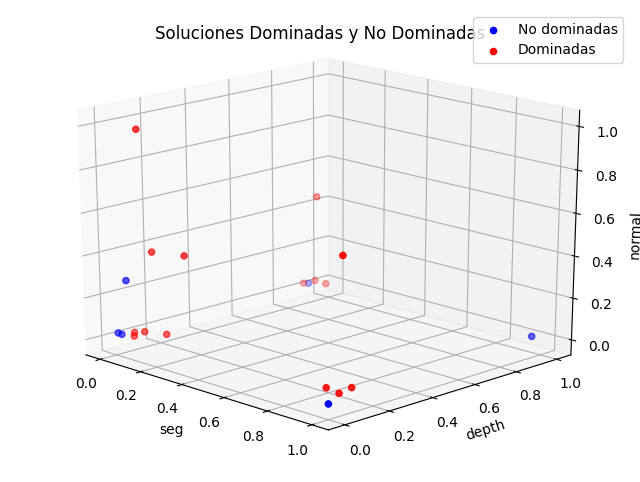

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
import glob

def dominance(a, b):
    """
    Determina si el vector de solución 'a' domina al vector de solución 'b'.

    Args:
    - a (list or numpy array): Vector de solución candidato.
    - b (list or numpy array): Vector de solución con el que se compara.

    Returns:
    - dom (bool): True si 'a' domina a 'b', False en caso contrario.
    """
    dom = all(ai <= bi for ai, bi in zip(a, b))
    #print('dom ', dom)
    return dom

def archive_update_pq(metrics_seg, metrics_depth, metrics_normal):
    """
    Actualiza el archivo con respecto a las métricas.
    """
    nA = len(metrics_seg)
    nP = len(metrics_seg)

    dominated_indices = []

    for i in range(nP):
        discard = False
        for j in range(nA):
            #print('\npunto 1: ', [metrics_seg[i], metrics_depth[i], metrics_normal[i]])
            #print('punto 2: ', [metrics_seg[j], metrics_depth[j], metrics_normal[j]])
            if i != j:
                if dominance([metrics_seg[j], metrics_depth[j], metrics_normal[j]], [metrics_seg[i], metrics_depth[i], metrics_normal[i]]):
                    discard = True
                   # print('i: ', i)
                    dominated_indices.append(i)
                    #print('dominated_indices: ', dominated_indices, '\n')
                    break

    return dominated_indices

if __name__ == "__main__":

    # Patrón para buscar archivos
    file_pattern = '/home/carmen/auto-lambda/logging/mtl_dense_mtan_nyuv2_all_combinations_none*.npy'
   # file_equal = '/home/carmen/auto-lambda/logging/other_methods/mtl_dense_split_nyuv2_all_equal_none_0_.npy'
    # Obtener la lista de archivos que coinciden con el patrón
    archivos = glob.glob(file_pattern)

    #archivos.append(file_equal)

    metrics = {
        'seg': [],
        'depth': [],
        'normal': [],
        'all': []
    }

    losses = {
        'seg': [],
        'depth': [],
        'normal': [],
        'all': []
    }

    pesos = []

    for archivo in archivos:
        data = np.load(archivo, allow_pickle=True).item()

        train = data['train_loss']
        test = data['test_loss']
        pesos.append(data['weight'][0])
        print('peso: ', data['weight'][0])

        train_metric_keys = list(test.keys())

        for i, key in enumerate(train_metric_keys):
            #last_loss, last_metric = test_loss[key][-1]
            if key !=  'all':
                losses[key].append(test[key][-1][0])
                metrics[key].append(test[key][-1][1])
        

    # Ejemplo de métricas
    metrics_seg = [-i for i in metrics['seg']]
    metrics_depth = metrics['depth']
    metrics_normal = metrics['normal']

    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    metrics_seg = scaler.fit_transform(np.array(metrics_seg).reshape(-1, 1))
    metrics_depth = scaler.fit_transform(np.array(metrics_depth).reshape(-1, 1))
    metrics_normal = scaler.fit_transform(np.array(metrics_normal).reshape(-1, 1))

    dominated_indices = archive_update_pq(metrics_seg, metrics_depth, metrics_normal)

    # Plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot soluciones no dominadas
    non_dominated = np.delete(np.arange(len(metrics_seg)), dominated_indices)
    ax.scatter(np.array(metrics_seg)[non_dominated], np.array(metrics_depth)[non_dominated], np.array(metrics_normal)[non_dominated], color='blue', label='No dominadas')

    # Plot soluciones dominadas
    ax.scatter(np.array(metrics_seg)[dominated_indices], np.array(metrics_depth)[dominated_indices], np.array(metrics_normal)[dominated_indices], color='red', label='Dominadas')

    # Añadir etiquetas de ejes
    ax.set_xlabel('seg')
    ax.set_ylabel('depth')
    ax.set_zlabel('normal')

    # Ajustar la posición de las etiquetas
    ax.view_init(elev=20, azim=-45)
    ax.set_title('Soluciones Dominadas y No Dominadas')
    ax.legend()
    plt.show()


In [14]:
len(pesos)

21

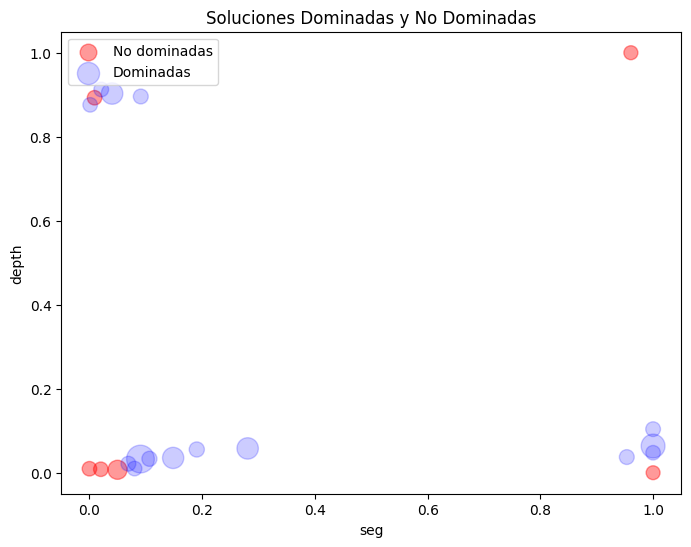

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

def dominance(a, b):
    """
    Determina si el vector de solución 'a' domina al vector de solución 'b'.
    Args:
    - a (list or numpy array): Vector de solución candidato.
    - b (list or numpy array): Vector de solución con el que se compara.
    Returns:
    - dom (bool): True si 'a' domina a 'b', False en caso contrario.
    """
    dom = all(ai <= bi for ai, bi in zip(a, b))
    return dom

def archive_update_pq(metrics_seg, metrics_depth, metrics_normal):
    """
    Actualiza el archivo con respecto a las métricas.
    """
    nA = len(metrics_seg)
    nP = len(metrics_seg)

    dominated_indices = []

    for i in range(nP):
        discard = False
        for j in range(nA):
            if i != j:
                if dominance([metrics_seg[j], metrics_depth[j], metrics_normal[j]], [metrics_seg[i], metrics_depth[i], metrics_normal[i]]):
                    discard = True
                    dominated_indices.append(i)
                    break

    return dominated_indices

if __name__ == "__main__":
    # Ejemplo de métricas
    metrics_seg = [-i for i in metrics['seg']]
    metrics_depth = metrics['depth']
    metrics_normal = metrics['normal']

    scaler = preprocessing.MinMaxScaler(feature_range=(100, 400))  # Definimos el rango de tamaño de los puntos
    point_sizes = scaler.fit_transform(np.array(metrics_normal).reshape(-1, 1))

    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    metrics_seg = scaler.fit_transform(np.array(metrics_seg).reshape(-1, 1))
    metrics_depth = scaler.fit_transform(np.array(metrics_depth).reshape(-1, 1))
    metrics_normal = scaler.fit_transform(np.array(metrics_normal).reshape(-1, 1))

    dominated_indices = archive_update_pq(metrics_seg, metrics_depth, metrics_normal)

    # Plot
    plt.figure(figsize=(8, 6))

    # Plot soluciones no dominadas
    non_dominated = np.delete(np.arange(len(metrics_seg)), dominated_indices)
    plt.scatter(np.array(metrics_seg)[non_dominated], np.array(metrics_depth)[non_dominated], s=point_sizes[non_dominated], alpha=0.4,  color='red', label='No dominadas')

    # Plot soluciones dominadas
    plt.scatter(np.array(metrics_seg)[dominated_indices], np.array(metrics_depth)[dominated_indices], s=point_sizes[dominated_indices], alpha=0.2, color='blue', label='Dominadas')

    # Añadir etiquetas de ejes
    plt.xlabel('seg')
    plt.ylabel('depth')

    plt.title('Soluciones Dominadas y No Dominadas')
    plt.legend()
    plt.show()


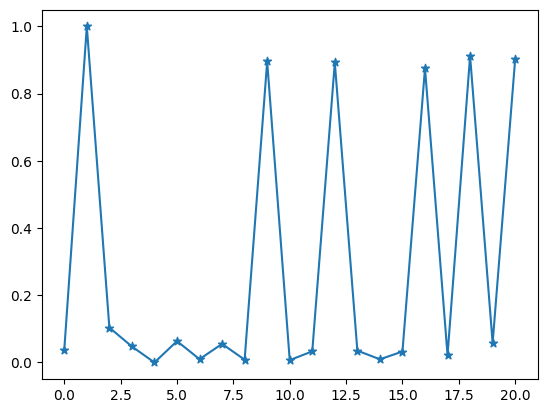

In [56]:
pesos_array = np.asarray(pesos)
t = pesos_array[:,0].reshape(-1, 1)

sorted_indices  = np.argsort(t[:,0])

plt.scatter(np.arange(21), metrics_depth[sorted_indices],  marker='*')
plt.plot(np.arange(21), metrics_depth[sorted_indices])



In [61]:
np.array(losses['seg'])[sorted_indices]

array([2.56470421, 2.56480126, 2.56495189, 2.56502511, 2.56495979,
       2.56502509, 1.24285081, 1.35375866, 1.15662745, 1.25498379,
       1.1937391 , 1.31846725, 1.21660238, 1.37371286, 1.19926678,
       1.32209598, 1.24818524, 1.28014672, 1.33997447, 1.38879477,
       1.39828602])

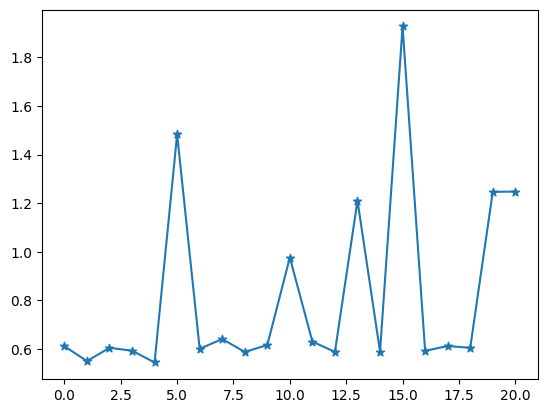

In [68]:
plt.scatter(np.arange(21), np.array(losses['normal'])[sorted_indices],  marker='*')
plt.plot(np.arange(21), np.array(losses['normal'])[sorted_indices])